In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Phishing_Legitimate_full.csv")   # make sure the file is in the same folder as your notebook

# Display first 5 rows
df.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [2]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [3]:
# Features (all columns except CLASS_LABEL)
X = df.drop(["CLASS_LABEL", "id"], axis=1)  # drop id too, since it's not useful

# Target (labels)
y = df["CLASS_LABEL"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)



Features shape: (10000, 48)
Target shape: (10000,)


In [4]:
from sklearn.model_selection import train_test_split

# Split dataset → 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (8000, 48)
Testing set: (2000, 48)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9705

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       988
           1       0.97      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [7]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.982

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [8]:
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


🔹 Decision Tree Accuracy: 0.9705
🔹 Random Forest Accuracy: 0.982


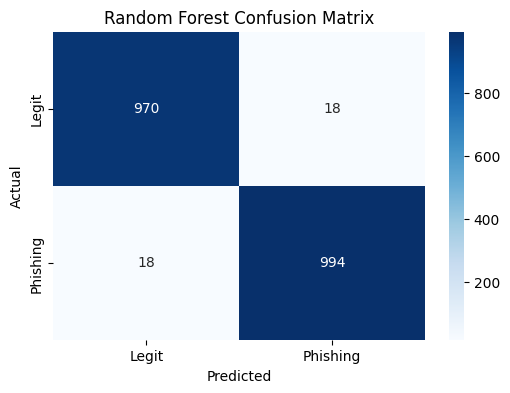

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [10]:
import numpy as np

# Function to predict phishing or legit
def predict_url(features):
    """
    features = list of values in the same order as X.columns
    Example: [NumDots, SubdomainLevel, PathLevel, UrlLength, ...]
    """
    prediction = rf.predict([features])[0]
    if prediction == 1:
        return "🚨 Phishing Website (Fake)"
    else:
        return "✅ Legit Website"


In [11]:
# Pick one random sample from test set
sample = X_test.iloc[0].values
print("Features:", sample)

print("Prediction:", predict_url(sample))


Features: [1.00000000e+00 0.00000000e+00 3.00000000e+00 6.00000000e+01
 5.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+01 4.30000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.53846154e-01 2.24137931e-01
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53846150e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00]


NameError: name 'rf' is not defined

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest again
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.982


In [13]:
# Pick one random sample from test set
sample = X_test.iloc[0].values
print("Features:", sample)

print("Prediction:", predict_url(sample))


Features: [1.00000000e+00 0.00000000e+00 3.00000000e+00 6.00000000e+01
 5.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+01 4.30000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.53846154e-01 2.24137931e-01
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53846150e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00]
Prediction: ✅ Legit Website


C:\Users\taman\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
# Pick one random sample from test set
sample = X_test.iloc[0].values
print("Features:", sample)

print("Prediction:", predict_url(sample))


Features: [1.00000000e+00 0.00000000e+00 3.00000000e+00 6.00000000e+01
 5.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+01 4.30000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.53846154e-01 2.24137931e-01
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53846150e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00]
Prediction: ✅ Legit Website


C:\Users\taman\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
def predict_url(features):
    if isinstance(features, np.ndarray):
        features = features.reshape(1, -1)
    else:
        features = [features]
        
    prediction = rf.predict(features)[0]
    if prediction == 1:
        return "🚨 Phishing Website (Fake)"
    else:
        return "✅ Legit Website"


In [16]:
# Take one test sample from your dataset
sample = X_test.iloc[0].values
print("Prediction:", predict_url(sample))

# Try another random sample
sample2 = X_test.iloc[5].values
print("Prediction:", predict_url(sample2))


Prediction: ✅ Legit Website
Prediction: ✅ Legit Website


C:\Users\taman\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\taman\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
# Take one test sample WITH feature names
sample = X_test.iloc[[0]]   # note the double [[ ]] keeps it a DataFrame

print("Prediction:", predict_url(sample.values[0]))


Prediction: ✅ Legit Website


C:\Users\taman\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
def predict_url(features):
    import pandas as pd
    
    # If it's a numpy array, convert to DataFrame with correct column names
    if isinstance(features, np.ndarray):
        features = pd.DataFrame([features], columns=X.columns)
    elif isinstance(features, list):
        features = pd.DataFrame([features], columns=X.columns)
    
    prediction = rf.predict(features)[0]
    if prediction == 1:
        return "🚨 Phishing Website (Fake)"
    else:
        return "✅ Legit Website"


In [19]:
sample = X_test.iloc[0].values
print("Prediction:", predict_url(sample))


Prediction: ✅ Legit Website


In [20]:
import re
import socket
from urllib.parse import urlparse

def extract_features_from_url(url):
    features = {}
    
    # URL Length
    features['UrlLength'] = len(url)
    
    # HTTPS present or not
    features['NoHttps'] = 0 if urlparse(url).scheme == "https" else 1
    
    # Number of dots
    features['NumDots'] = url.count('.')
    
    # IP Address usage
    try:
        socket.inet_aton(urlparse(url).netloc)  # check if netloc is IP
        features['IpAddress'] = 1
    except:
        features['IpAddress'] = 0
    
    # Presence of phishing keywords
    phishing_keywords = ['login', 'secure', 'bank', 'account', 'update', 'free', 'verify']
    features['NumSensitiveWords'] = sum(keyword in url.lower() for keyword in phishing_keywords)
    
    # Simple placeholders for missing dataset features
    # (set them to 0 to keep alignment with your dataset columns)
    for col in X.columns:
        if col not in features:
            features[col] = 0
    
    return [features[col] for col in X.columns]


In [21]:
test_url = "http://192.168.1.10/bank-login"
features = extract_features_from_url(test_url)
print("Features extracted:", features[:10])  # show first 10
print("Prediction:", predict_url(features))


Features extracted: [3, 0, 0, 30, 0, 0, 0, 0, 0, 0]
Prediction: ✅ Legit Website


In [1]:
import pickle

# Save trained RandomForest model
with open("phishing_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save feature column names
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)


NameError: name 'rf' is not defined

In [2]:
import pickle

# Save trained RandomForest model
with open("phishing_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save feature column names
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)


NameError: name 'rf' is not defined

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example: split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


NameError: name 'X' is not defined